In [1]:
#importing required libraries
import numpy as np
import pandas as pd


columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']

#importing data set
df=pd.read_csv('iris.csv',names=columns)

#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [2]:
#describing data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#splitting values by attribute and target
data=df.values

x=data[:,0:4]
y=data[:,4]


In [4]:
Y_Data = np.array([np.average(x[:, i][y==j].astype('float32')) for i in range (x.shape[1])
 for j in (np.unique(y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

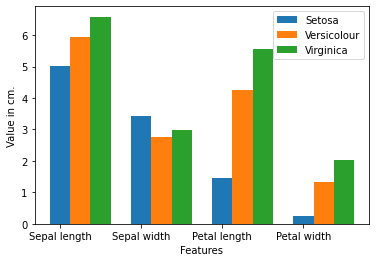

In [5]:
#Visualising the data by bargraph
import matplotlib.pyplot as plt

plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend()
plt.show()

In [6]:
#Importing librairies and training model
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
#Training data set by using KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
x_train.shape


(120, 4)

In [8]:
x_test.shape

(30, 4)

In [9]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=knn.predict(x_test)

In [11]:
#confusion matrix for tested and predicted values
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  6]], dtype=int64)

In [12]:
#Testing accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [13]:
#Prediction of the species from the input vector
X_new = np.array([[1,2,3,4]])
prediction = knn.predict(X_new)
print(prediction)

['Iris-versicolor']
